# Predict Tax from Price
## 4.2 HOMETAX

In [271]:
install.packages("tidyverse")
install.packages("gridExtra")
install.packages("nortest")

require(tidyverse)
require(gridExtra)
require("nortest")

options(repr.plot.width=20, repr.plot.height=9)

    homes_df <- read.table("/Users/jmanderson/statistics/02_intro-to-regression/ARM by Iain - Exercises/data/hometax.csv", 
                           sep=",", header = T, stringsAsFactors = F)


The downloaded binary packages are in
	/var/folders/tz/875z4smn2sz0kndfn6lyfvf40000gn/T//RtmpLrU7Rw/downloaded_packages

The downloaded binary packages are in
	/var/folders/tz/875z4smn2sz0kndfn6lyfvf40000gn/T//RtmpLrU7Rw/downloaded_packages

The downloaded binary packages are in
	/var/folders/tz/875z4smn2sz0kndfn6lyfvf40000gn/T//RtmpLrU7Rw/downloaded_packages


In [272]:
head(homes_df)

,Tax,Price
,<int>,<dbl>
1,1639,205.0
2,1088,208.0
3,1193,215.0
4,1635,215.0
5,1732,199.9
6,1534,190.0


## Simple Model


Call:
lm(formula = Tax ~ Price, data = homes_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-414.27  -81.18   -3.52   65.39  465.99 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  61.2716    41.9781    1.46    0.147    
Price         6.8763     0.3645   18.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 141.9 on 102 degrees of freedom
Multiple R-squared:  0.7773,	Adjusted R-squared:  0.7751 
F-statistic: 355.9 on 1 and 102 DF,  p-value: < 2.2e-16


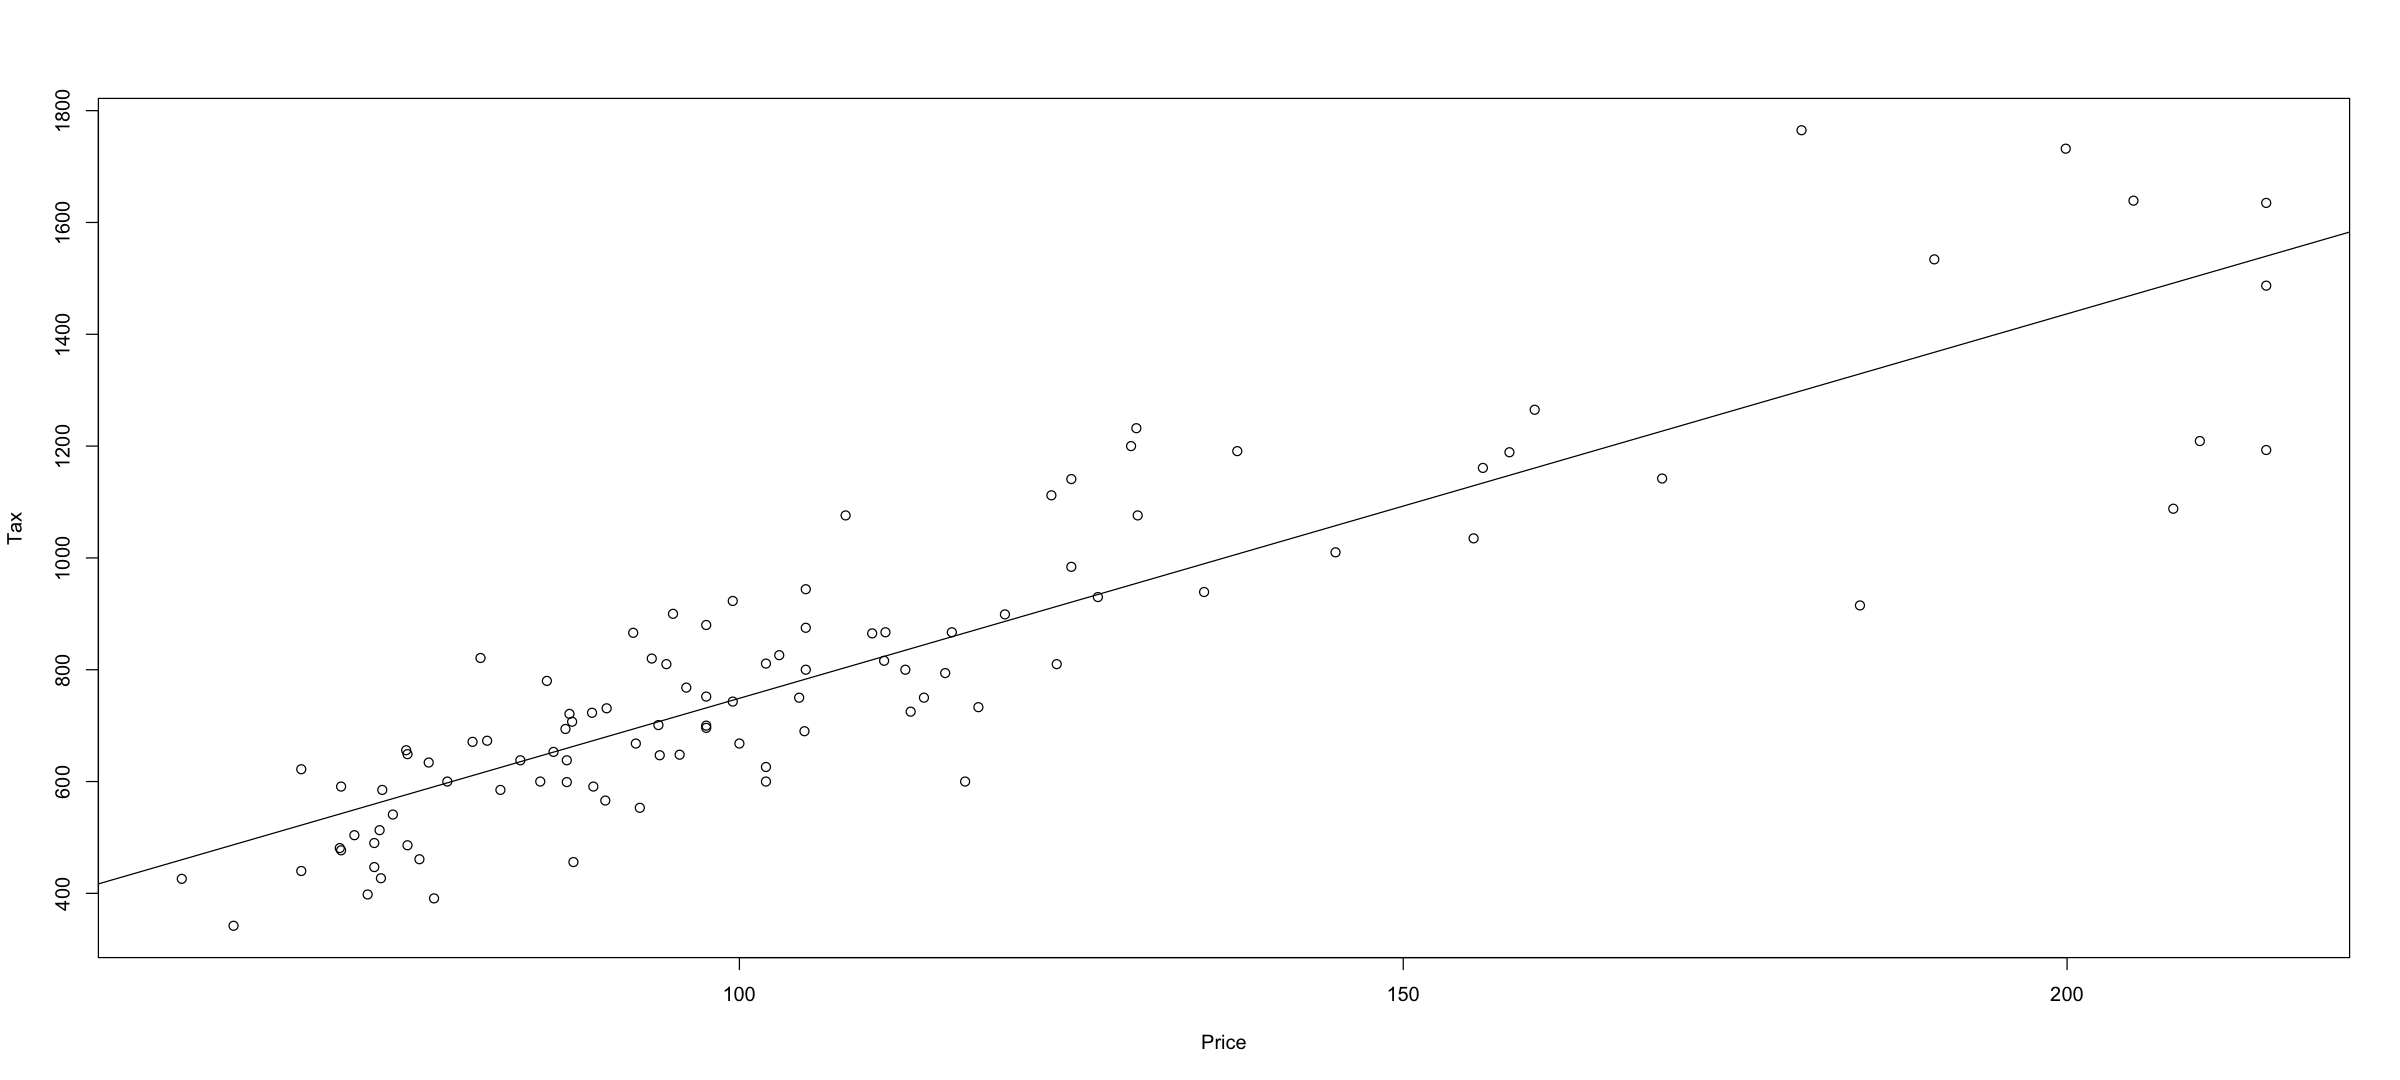

In [179]:
model_1 <- lm(Tax~Price, homes_df)

summary(model_1)
plot(Tax~Price, homes_df)
abline(model_1)

### Prediction Intervals

Warning message in predict.lm(model_1, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


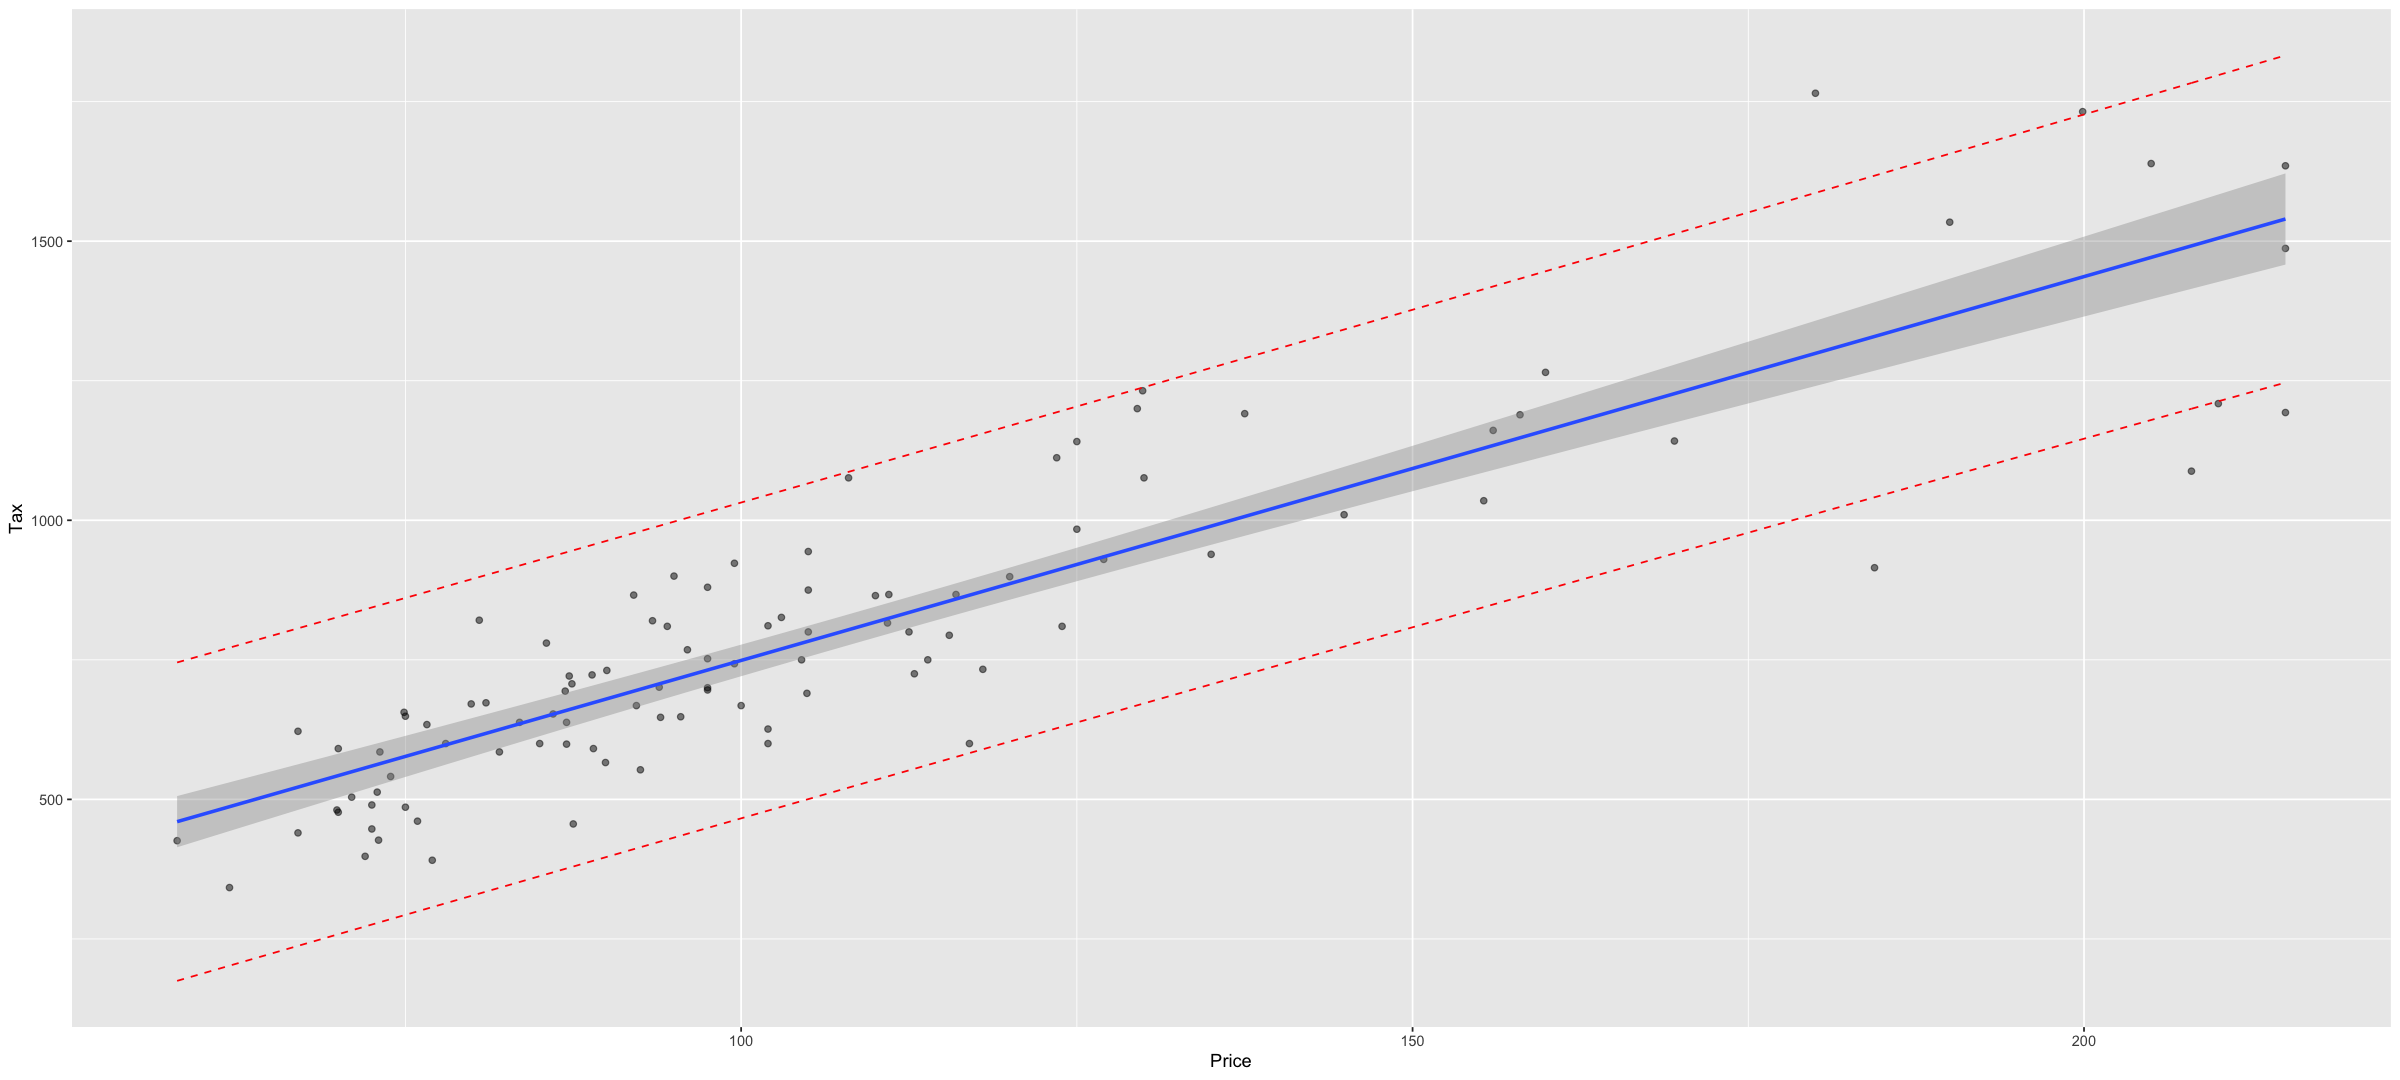

In [46]:
predicted_mod1 <- predict(model_1, interval="prediction")
mergedMod1 <- cbind(homes_df, predicted_mod1)

ggplot(mergedMod1, aes(y=Tax, x=Price)) + 
    geom_point(alpha = .5) + 
    stat_smooth(method = "lm", formula = y~x) +
    geom_line(aes(y=lwr), color = "red", linetype = "dashed") +
    geom_line(aes(y=upr), color = "red", linetype = "dashed")

## Logarithmic Model

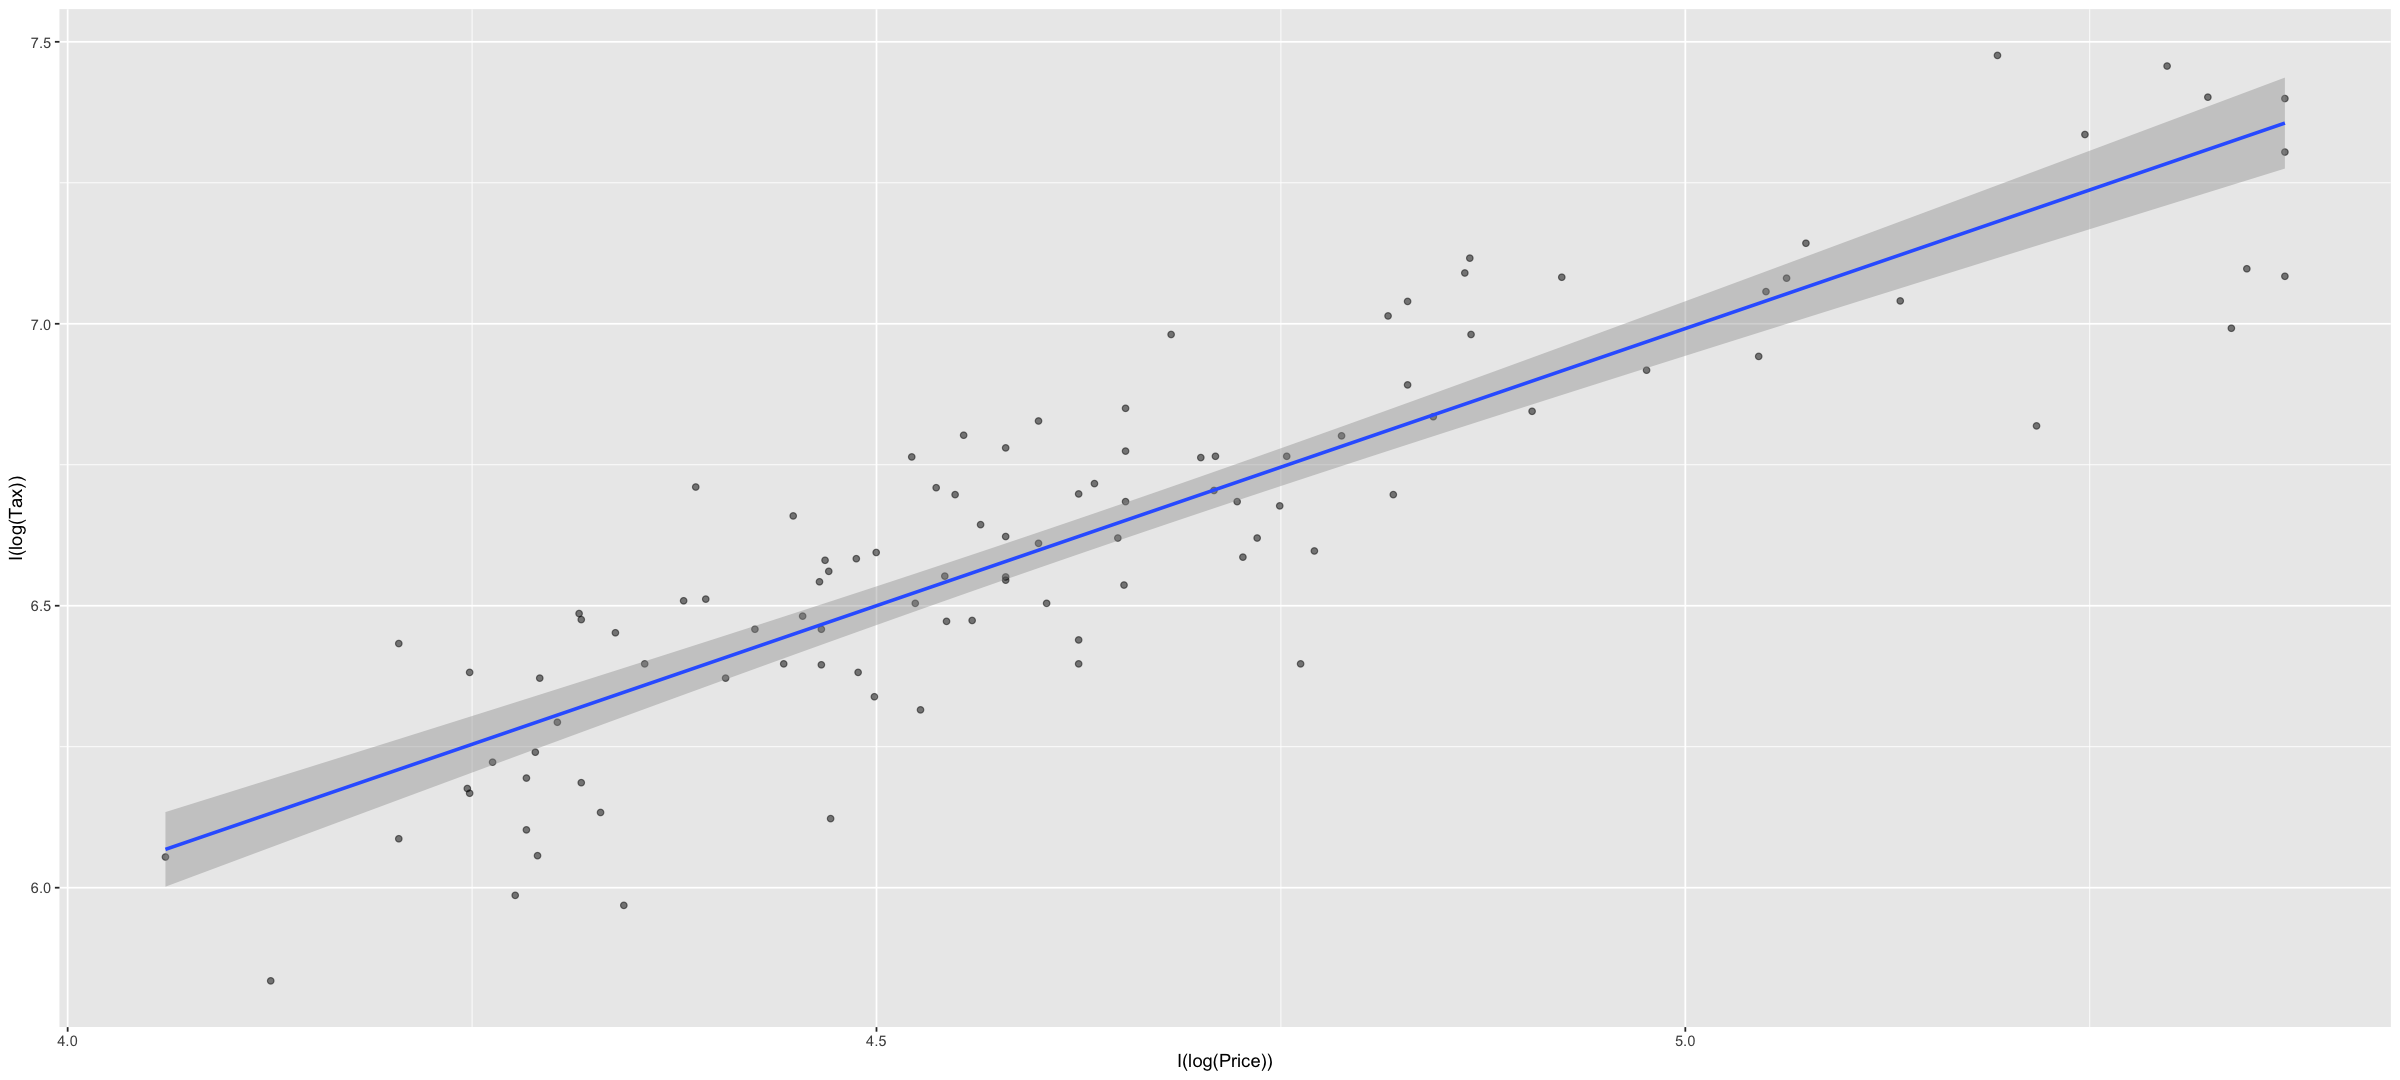

In [62]:
model_2 <- lm(I(log(Tax))~I(log(Price)), homes_df)

ggplot(homes_df, aes(y=I(log(Tax)), x=I(log(Price)))) + 
  geom_point(alpha = .5) + 
  stat_smooth(method = "lm", formula = y~x)

### Prediction Intervals


Call:
lm(formula = I(log(Tax)) ~ I(log(Price)), data = homes_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38606 -0.09317  0.01157  0.11096  0.32032 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.076      0.237   8.762 4.42e-14 ***
I(log(Price))    0.983      0.051  19.276  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1616 on 102 degrees of freedom
Multiple R-squared:  0.7846,	Adjusted R-squared:  0.7825 
F-statistic: 371.6 on 1 and 102 DF,  p-value: < 2.2e-16


Warning message in predict.lm(model_2, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


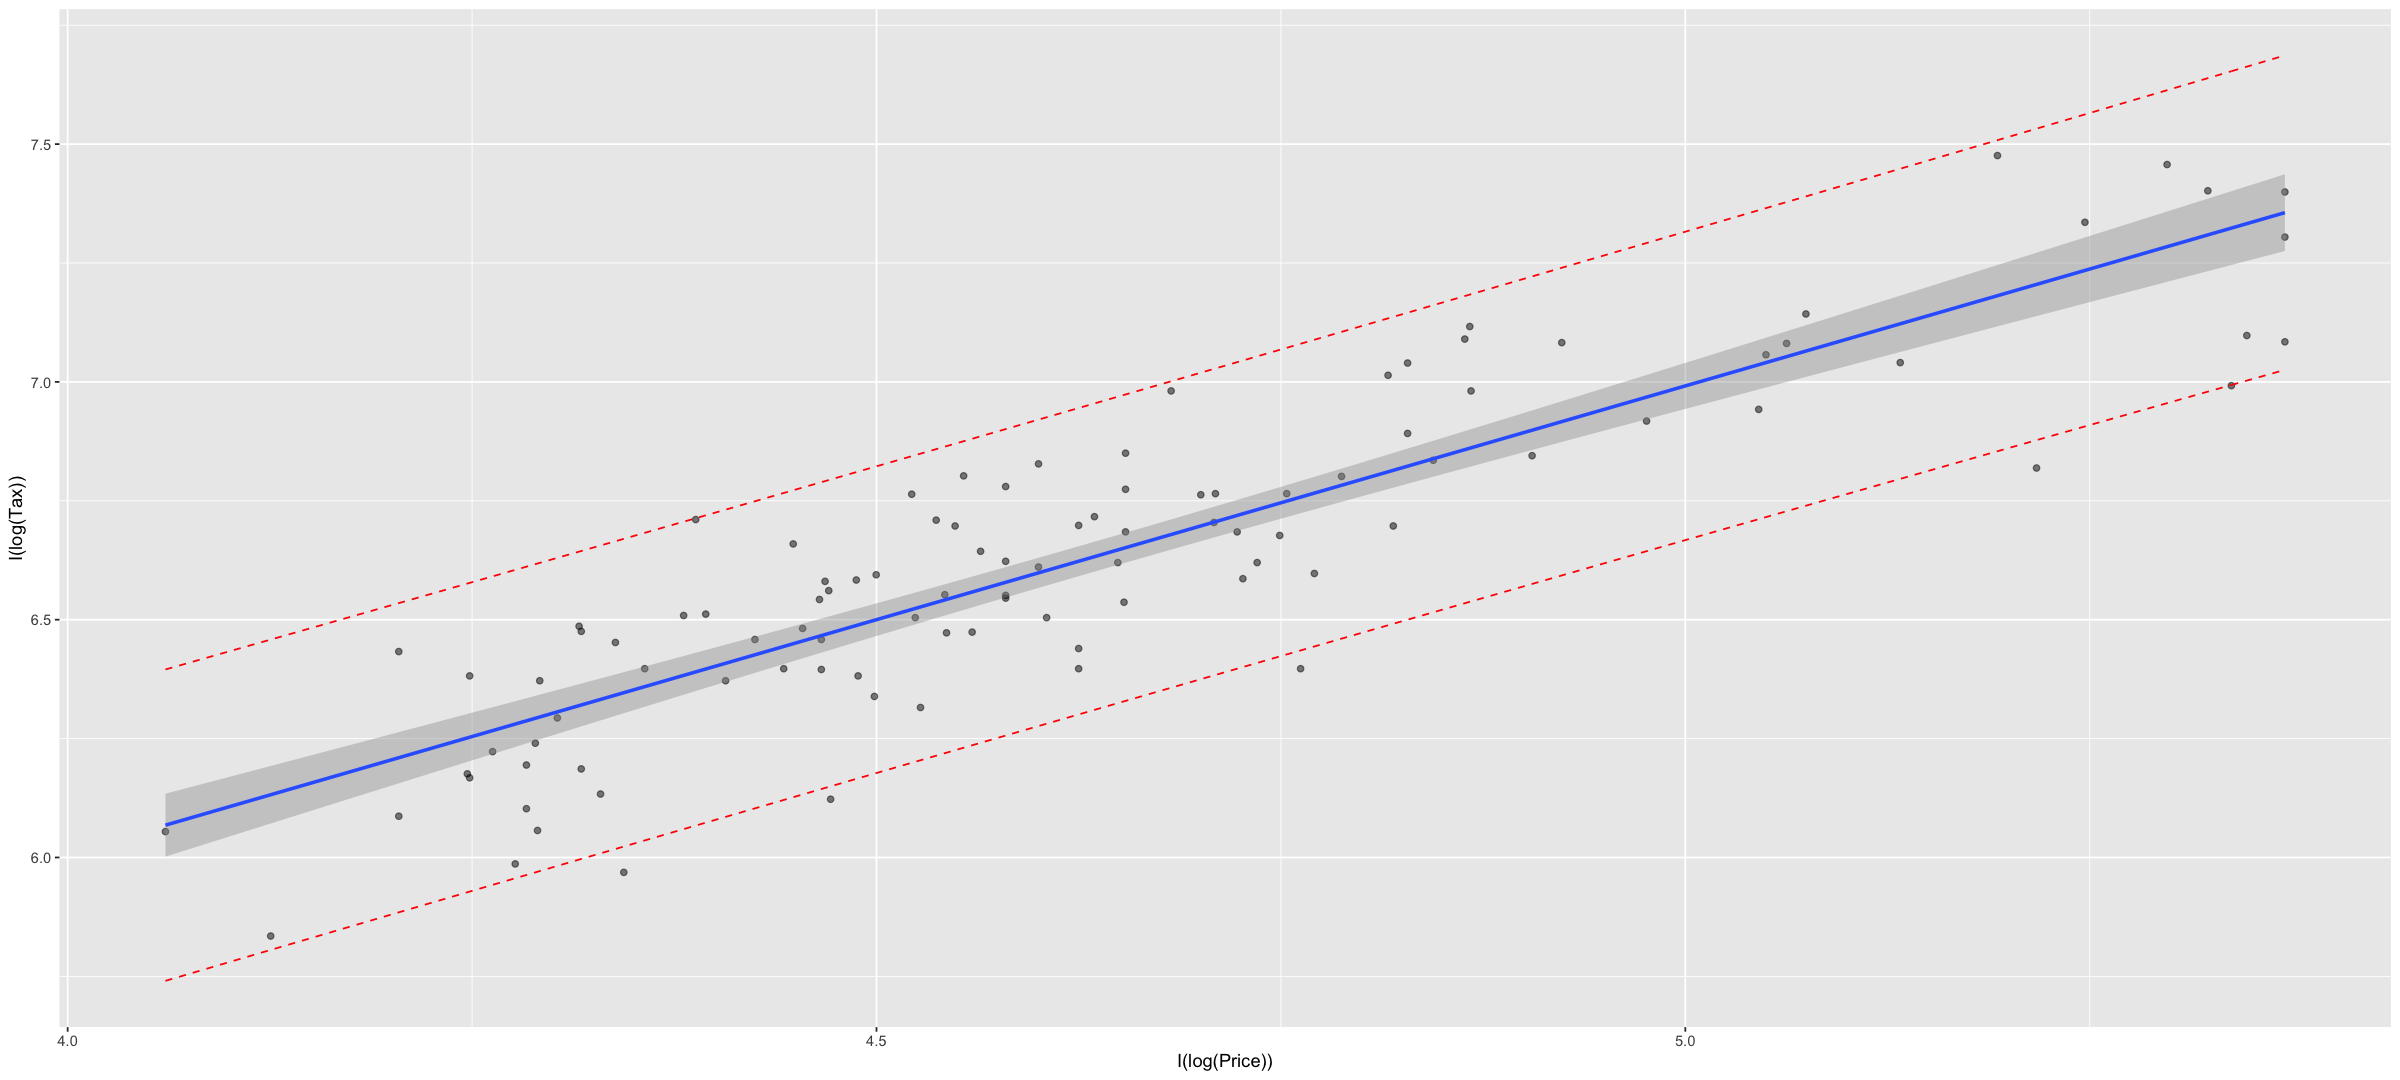

In [253]:
summary(model_2)
predicted_mod2 <- predict(model_2, interval="prediction")
mergedMod2 <- cbind(homes_df, predicted_mod2)

ggplot(mergedMod2, aes(y=I(log(Tax)), x=I(log(Price))))+
    geom_point(alpha = .5) + 
    stat_smooth(method = "lm", formula = y~x) +
    geom_line(aes(y=lwr), color = "red", linetype = "dashed") +
    geom_line(aes(y=upr), color = "red", linetype = "dashed")

## How to Back Transform

### So lets say we want to get a prediction interval for Price=100. First we need to get a point estimate. 
We can get it in either the transformed or original depedening on our need. Lets get both so we have an idea of our best estimate and also a value for our standard error of prediction formula.

In [269]:
y_bar <- 2.076+0.983*(log(100))
y_bar_back_transformed <- exp(2.076+0.983*(log(100)))
y_bar_back_transformed

[1] 737.217

### Then we will need the Sum of Squares for Predictor variable to use in the stanard error for prediction formula

In [258]:
## You can retrieve the sum of squares this way
ss1 <- var(homes_df$Price) * (nrow(homes_df) - 1)

## Or using this more rudimentary level function
ssd <- function(x){
    ss <- 0
    for(i in x){
        ss = ss + (i - mean(x))^2
    }
    return(ss)
}

ssd(homes_df$Price)

[1] 151577.1

### Third we will need to calculate the standard error for prediction

In [260]:
numerator <- (100-108.6)^2
denominator <- ss1
s <- 0.1616

s_yp1 <- s*(sqrt(1+(1/104)+(numerator/denominator)))
y_bar <- 2.076+0.983*(log(100))

cat("95% Transformed PI: (",
    y_bar-1.97*(s_yp1),",",
    y_bar+1.97*(s_yp1),")")

95% Transformed PI: ( 6.282926 , 6.922838 )

In [265]:
cat("95% PI: (",
    exp(6.28292612823353),",",
    exp(6.92283845741906),")")

95% PI: ( 535.3529 , 1015.198 )

### Confirm using lm.predict

In [270]:
filter(mergedMod2, Price==100)

Tax,Price,fit,lwr,upr
<int>,<dbl>,<dbl>,<dbl>,<dbl>
668,100,6.60343,6.281257,6.925603
